## Get and save railway and subway data

In [24]:
# Import libraries
import osmnx as ox
import matplotlib.pyplot as plt
import geopandas as gpd
%matplotlib inline

# Download multidigraph using osmnx
G = ox.graph_from_place('Uusimaa, Finland',
                        retain_all=False, truncate_by_edge=True, simplify=False,
                        network_type='none', infrastructure='way["railway"~"subway|rail"]')

# Convert multidigraph to geodataframe
nodes, edges = ox.graph_to_gdfs(G)

#### Visualize edges to test it work

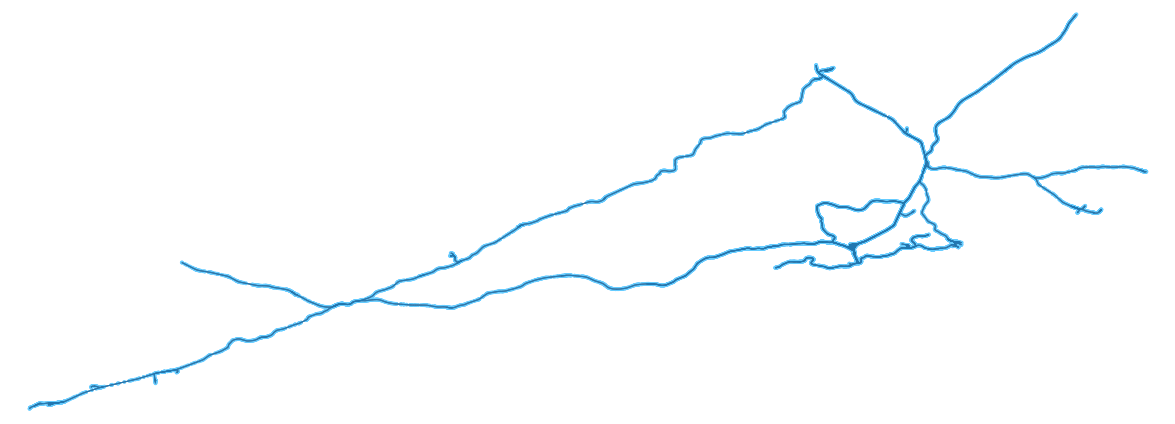

In [26]:
# Initialize figure
fig, ax = ox.plot_graph(G, show=False, close=False)

# Plot street edges
edges.plot(ax=ax, linewidth=1)

# Plot restaurants
plt.tight_layout()

#### Filter railways to cover only area with population data

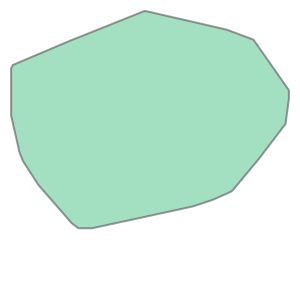

In [33]:
# Read population shapefile
fp = "population_data/population2013to2019.shp"
pop_data = gpd.read_file(fp)

# Create convex hull which covers all the coordinates
extent = pop_data["geometry"].unary_union.convex_hull

# Add buffer
#extent_no_buffer = extent
extent = extent.buffer(0.1)

# Simplify geometry to boost further steps
extent = extent.simplify(tolerance=0.005)

extent

## Save railway data

In [28]:
# Write to Shapefile (just make a copy)
outfp = "railway_data/railways.shp"
edges.to_file(outfp)